# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# columns for lat, lon, temp_max, humidity, clouds, wind speed, country, date

lat = []
lon = []
temperatures = []
wind_speed = []
clouds = []
humidity = []
country = []
date = []

cities_found = []

for city in cities:
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

    # Get weather data
    
    
    try:
        print("Found city: " + city)
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        temperatures.append(weather_json["main"]["temp"])
        wind_speed.append(weather_json["wind"]["speed"])
        clouds.append(weather_json["clouds"]["all"])
        humidity.append(weather_json["main"]["humidity"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
          
        # Do this at the end after appending the other lists           
        cities_found.append(city)

    except:
        
        print("Could not find: " + city)
    

Found city: san quintin
Found city: sao filipe
Found city: rio gallegos
Found city: bluff
Found city: turiacu
Found city: punta arenas
Found city: castro
Found city: vao
Found city: vestmannaeyjar
Found city: vaini
Found city: iracoubo
Found city: hobart
Found city: taolanaro
Could not find: taolanaro
Found city: rikitea
Found city: ballina
Found city: kapaa
Found city: fairbanks
Found city: kavieng
Found city: sao joao da barra
Found city: shahrud
Found city: kodiak
Found city: ushuaia
Found city: katsuura
Found city: ponta do sol
Found city: albany
Found city: qaanaaq
Found city: mataura
Found city: arraial do cabo
Found city: atuona
Found city: adrar
Found city: hilo
Found city: victoria
Found city: puerto ayora
Found city: saint-philippe
Found city: cherskiy
Found city: ngukurr
Could not find: ngukurr
Found city: karaton
Found city: corrente
Found city: boa vista
Found city: sao jose da coroa grande
Found city: marcona
Could not find: marcona
Found city: abeche
Found city: bam
Foun

Found city: coahuayana
Found city: yaan
Found city: lata
Found city: tsihombe
Could not find: tsihombe
Found city: urumqi
Found city: darnah
Found city: pakxan
Found city: shirvan
Found city: grand-lahou
Found city: pauri
Found city: natal
Found city: pattaya
Found city: tacuarembo
Found city: katangli
Found city: sorland
Found city: orotukan
Found city: baiyin
Found city: aykhal
Found city: raudeberg
Found city: kindu
Found city: karratha
Found city: salamiyah
Found city: bobcaygeon
Found city: wamba
Found city: santa maria
Found city: bandarbeyla
Found city: okhotsk
Found city: zyryanka
Found city: inta
Found city: paranaiba
Found city: astoria
Found city: leningradskiy
Found city: atambua
Found city: jujuy
Could not find: jujuy
Found city: mys shmidta
Could not find: mys shmidta
Found city: gananoque
Found city: kabanjahe
Found city: qabis
Could not find: qabis
Found city: ojinaga
Found city: hasaki
Found city: grindavik
Found city: gore
Found city: san jose
Found city: ust-omchug
F

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_weather = {
    "City": cities_found,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temperatures,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date 
}

city_data = pd.DataFrame(city_weather)
city_data

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,san quintin,30.4833,-115.9500,64.36,48,0,14.00,MX,1634054146
1,sao filipe,14.8961,-24.4956,79.65,72,7,5.03,CV,1634054146
2,rio gallegos,-51.6226,-69.2181,60.85,21,90,18.41,AR,1634054146
3,bluff,-46.6000,168.3333,44.94,68,100,22.03,NZ,1634054147
4,turiacu,-1.6633,-45.3717,92.57,45,25,8.37,BR,1634054147
...,...,...,...,...,...,...,...,...,...
535,aberdeen,57.1437,-2.0981,50.52,76,40,4.61,GB,1634054234
536,cururupu,-1.8283,-44.8683,91.60,45,51,8.01,BR,1634054348
537,inhambane,-23.8650,35.3833,76.98,53,20,11.50,MZ,1634054348
538,divala,8.4167,-82.7167,84.11,68,54,3.56,PA,1634054348


In [13]:
city_data.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,20.956043,17.674842,61.859537,69.062963,61.350000,8.199963,1.634054e+09
std,34.274816,90.878232,21.091812,21.852340,37.531702,5.560059,7.090286e+01
min,-54.800000,-179.166700,-9.330000,6.000000,0.000000,0.000000,1.634054e+09
25%,-7.919775,-59.747225,45.135000,59.000000,22.750000,4.175000,1.634054e+09
50%,26.304650,22.430700,67.040000,74.000000,75.000000,6.910000,1.634054e+09
75%,51.168550,97.337500,78.427500,86.000000,98.000000,11.120000,1.634054e+09
max,78.218600,179.316700,104.970000,100.000000,100.000000,28.480000,1.634054e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

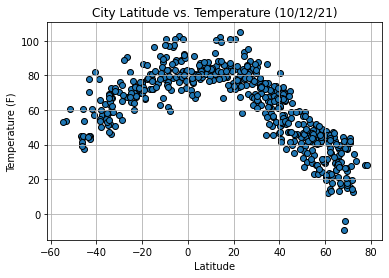

In [23]:
x_values = city_data['Latitude']
y_values = city_data['Temperature']
plt.scatter(x_values,y_values,edgecolors= 'k')
plt.title('City Latitude vs. Temperature (10/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

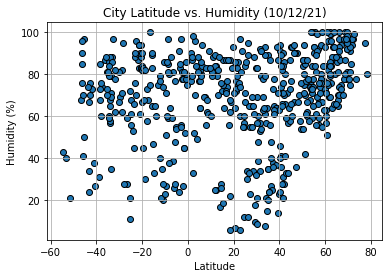

In [24]:
x_values = city_data['Latitude']
y_values = city_data['Humidity']
plt.scatter(x_values,y_values,edgecolors= 'k')
plt.title('City Latitude vs. Humidity (10/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

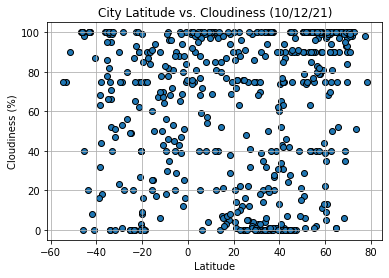

In [25]:
x_values = city_data['Latitude']
y_values = city_data['Cloudiness']
plt.scatter(x_values,y_values,edgecolors= 'k')
plt.title('City Latitude vs. Cloudiness (10/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

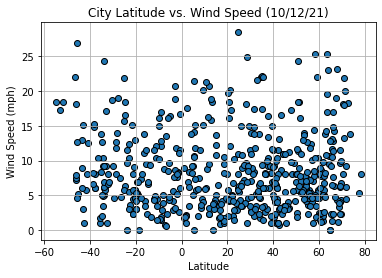

In [26]:
x_values = city_data['Latitude']
y_values = city_data['Wind Speed']
plt.scatter(x_values,y_values,edgecolors= 'k')
plt.title('City Latitude vs. Wind Speed (10/12/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Temperature vs. Latitude Linear Regression

The r-value is: -0.8800919596062386


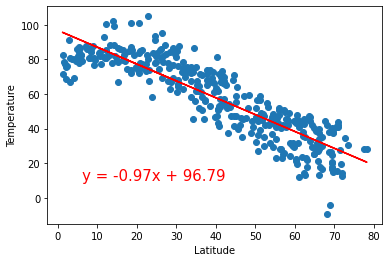

In [31]:
city_data_north = city_data.loc[(city_data['Latitude']>=0)]

city_data_north

x_values = city_data_north['Latitude']
y_values = city_data_north['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Temperature vs. Latitude Linear Regression

The r-value is: 0.7666051512868548


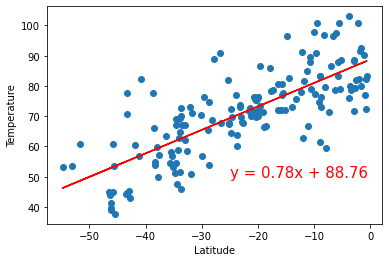

In [51]:
city_data_south = city_data.loc[(city_data['Latitude']<=0)]

city_data_south

x_values = city_data_south['Latitude']
y_values = city_data_south['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.8800919596062386


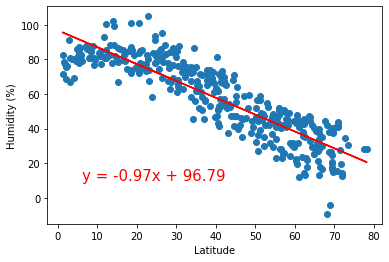

In [38]:
city_data_north = city_data.loc[(city_data['Latitude']>=0)]

city_data_north

x_values = city_data_north['Latitude']
y_values = city_data_north['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.023313761357377945


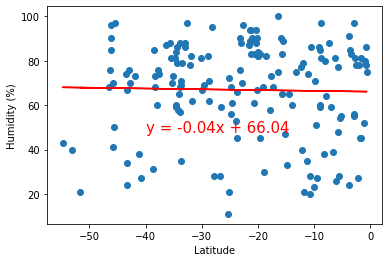

In [57]:
city_data_south = city_data.loc[(city_data['Latitude']<=0)]

city_data_south

x_values = city_data_south['Latitude']
y_values = city_data_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,48),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20727859258106965


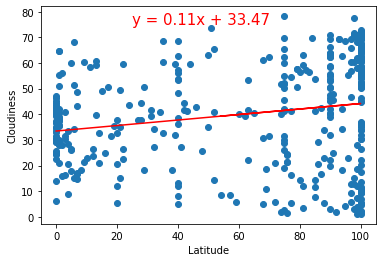

In [62]:
city_data_north = city_data.loc[(city_data['Latitude']>=0)]

city_data_north

x_values = city_data_north['Cloudiness']
y_values = city_data_north['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.10162677154135749


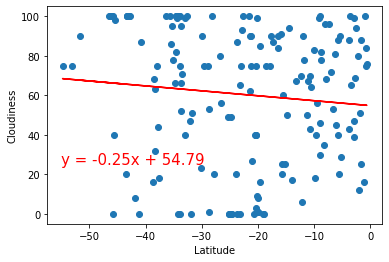

In [63]:
city_data_south = city_data.loc[(city_data['Latitude']<=0)]

city_data_south

x_values = city_data_south['Latitude']
y_values = city_data_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04023591300516471


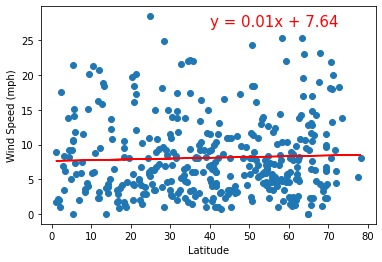

In [66]:
city_data_north = city_data.loc[(city_data['Latitude']>=0)]

city_data_north

x_values = city_data_north['Latitude']
y_values = city_data_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,27),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04023591300516471


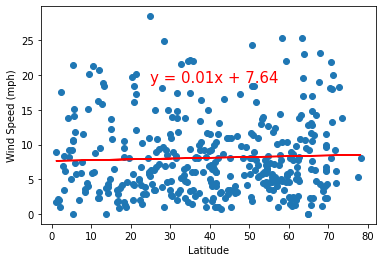

In [69]:
city_data_south = city_data.loc[(city_data['Latitude']>=0)]

city_data_south

x_values = city_data_south['Latitude']
y_values = city_data_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,19),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()